In [1]:
import pandas as pd

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8,8)

In [6]:
ls

Data_QA.EDA.ipynb                   drugoverdose.1.initial_process.csv
InitialprocessingEDA.ipynb          drugoverdose.csv


In [7]:
drugoverdose = pd.read_csv("drugoverdose.1.initial_process.csv")

In [8]:
drugoverdose.shape

(9310, 4)

In [9]:
drugoverdose.head()

,state,year,month,deaths
0,AK,2015,January,4034.0
1,AK,2015,February,4084.0
2,AK,2015,March,4101.0
3,AK,2015,April,4133.0
4,AK,2015,May,4196.0


In [10]:
#check for duplicates

In [13]:
drugoverdose['unique_overdosemonth'] = drugoverdose.month.str.cat(
    [drugoverdose.state, drugoverdose.year.apply(str)], sep='-')

In [16]:
drugoverdose[["state", "year", "deaths", "unique_overdosemonth"]].head()

,state,year,deaths,unique_overdosemonth
0,AK,2015,4034.0,January-AK-2015
1,AK,2015,4084.0,February-AK-2015
2,AK,2015,4101.0,March-AK-2015
3,AK,2015,4133.0,April-AK-2015
4,AK,2015,4196.0,May-AK-2015


In [18]:
drugoverdose.unique_overdosemonth.value_counts()

November-NH-2015     10
April-MD-2017        10
May-ME-2017          10
February-NC-2016     10
July-NV-2016         10
May-UT-2015          10
March-VT-2015        10
November-SC-2017     10
April-MD-2016        10
July-SC-2016         10
October-OR-2017      10
August-NC-2015       10
June-WV-2015         10
January-NH-2016      10
April-RI-2015        10
November-OK-2015     10
August-DC-2016       10
January-ME-2015      10
May-NY-2015          10
October-NM-2015      10
March-ME-2016        10
February-SC-2017     10
April-WV-2015        10
December-OK-2015     10
August-NC-2017       10
May-NV-2017          10
April-VT-2015        10
August-VA-2017       10
March-US-2017        10
June-NH-2015         10
                     ..
November-OH-2017      2
May-PA-2017           2
November-IL-2016      2
September-CA-2016     2
July-WY-2015          2
September-HI-2017     2
August-GA-2016        2
September-HI-2015     2
March-AL-2015         2
January-OH-2015       2
November-NJ-2016

In [19]:
drugoverdose[drugoverdose.unique_overdosemonth=="November-NH-2015"].head()

,state,year,month,deaths,unique_overdosemonth
3510,NH,2015,November,48.0,November-NH-2015
3545,NH,2015,November,86.0,November-NH-2015
3580,NH,2015,November,23.0,November-NH-2015
3615,NH,2015,November,70.0,November-NH-2015
3650,NH,2015,November,11736.0,November-NH-2015


In [20]:
drugoverdose = drugoverdose.drop_duplicates()

In [21]:
drugoverdose.shape

(9278, 5)

In [23]:
del drugoverdose['unique_overdosemonth']

In [24]:
n_records = len(drugoverdose)
def duplicate_values_col(df):
    for column in df:
        column_counts = df[column].value_counts()
        most_common = column_counts.iloc[0]
        least_common = column_counts.iloc[-1]
        print("{} | {}-{} | {}".format(
            df[column].name,
            round(most_common / (1.0 * n_records),3),
            round(least_common / (1.0 * n_records),3),
            df[column].dtype
        ))

duplicate_values_col(drugoverdose)

state | 0.038-0.008 | object
year | 0.343-0.314 | int64
month | 0.086-0.057 | object
deaths | 0.005-0.0 | float64


In [25]:
#Year makes sense

In [26]:
#Time to check for missing values

In [28]:
n_records = len(drugoverdose)
def missing_values_df(df):
    for column in df:
        print("{} | {} | {}".format(
            column, len(df[df[column].isnull()]) / (1.0*n_records), df[column].dtype
        ))

missing_values_df(drugoverdose)

state | 0.0 | object
year | 0.0 | int64
month | 0.0 | object
deaths | 0.0 | float64


In [29]:
#all good

In [30]:
#Outliers

In [31]:
from scipy import stats
import numpy as np

def outliers_col(df):
    for column in df:
        if df[column].dtype != np.object:
            n_outliers = len(df[(np.abs(stats.zscore(df[column])) > 3)& \
                  (df[column].notnull())
                 ])
            print("{} | {} | {}".format(
                df[column].name,
                n_outliers,
                df[column].dtype
        ))

outliers_col(drugoverdose)

year | 0 | int64
deaths | 35 | float64


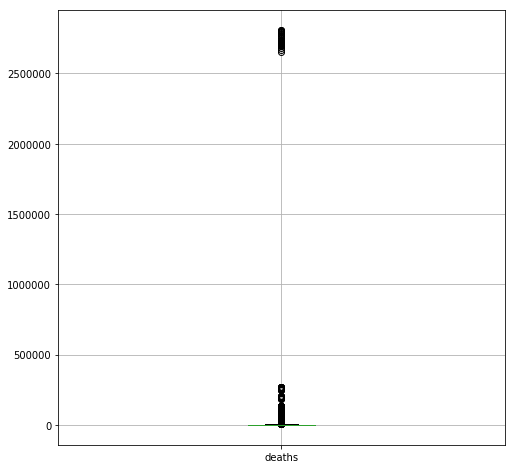

In [33]:
drugoverdose.boxplot(column='deaths');

In [36]:
drugoverdose[drugoverdose.deaths >500000].head()

,state,year,month,deaths
6860,US,2015,January,2653334.0
6861,US,2015,February,2668442.0
6862,US,2015,March,2682744.0
6863,US,2015,April,2691628.0
6864,US,2015,May,2698421.0


In [37]:
drugoverdose = drugoverdose[drugoverdose.deaths < 500000]

In [38]:
drugoverdose[drugoverdose.deaths >500000].head()

,state,year,month,deaths


In [39]:
from scipy import stats
import numpy as np

def outliers_col(df):
    for column in df:
        if df[column].dtype != np.object:
            n_outliers = len(df[(np.abs(stats.zscore(df[column])) > 3)& \
                  (df[column].notnull())
                 ])
            print("{} | {} | {}".format(
                df[column].name,
                n_outliers,
                df[column].dtype
        ))

outliers_col(drugoverdose)

year | 0 | int64
deaths | 192 | float64


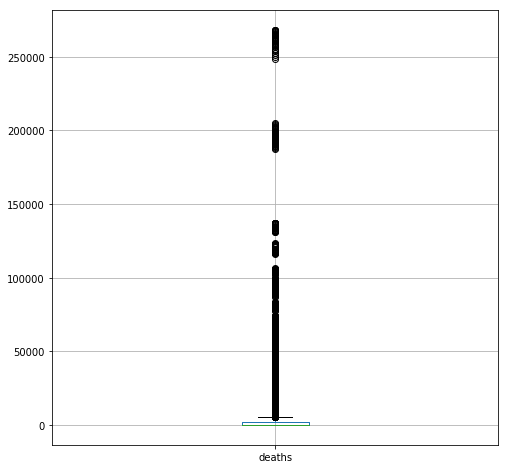

In [40]:
drugoverdose.boxplot(column='deaths');

In [43]:
drugoverdose[drugoverdose.deaths == 0].head()

,state,year,month,deaths


In [45]:
drugoverdose = drugoverdose[drugoverdose.deaths > 50]

In [46]:
from scipy import stats
import numpy as np

def outliers_col(df):
    for column in df:
        if df[column].dtype != np.object:
            n_outliers = len(df[(np.abs(stats.zscore(df[column])) > 3)& \
                  (df[column].notnull())
                 ])
            print("{} | {} | {}".format(
                df[column].name,
                n_outliers,
                df[column].dtype
        ))

outliers_col(drugoverdose)

year | 0 | int64
deaths | 175 | float64


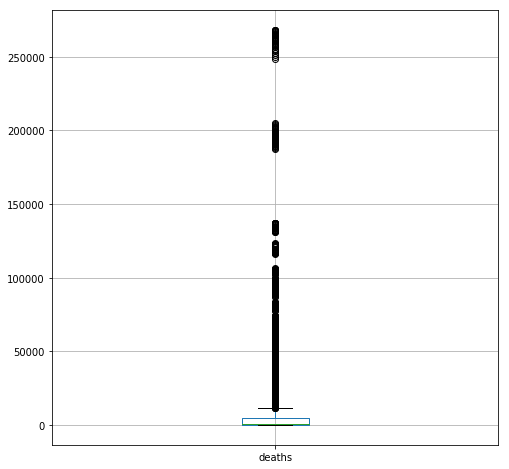

In [47]:
drugoverdose.boxplot(column='deaths');

In [49]:
drugoverdose = drugoverdose[drugoverdose.deaths > 500]

In [51]:
drugoverdose.shape

(3891, 4)

In [52]:
from scipy import stats
import numpy as np

def outliers_col(df):
    for column in df:
        if df[column].dtype != np.object:
            n_outliers = len(df[(np.abs(stats.zscore(df[column])) > 3)& \
                  (df[column].notnull())
                 ])
            print("{} | {} | {}".format(
                df[column].name,
                n_outliers,
                df[column].dtype
        ))

outliers_col(drugoverdose)

year | 0 | int64
deaths | 105 | float64


In [53]:
#Conclusion
# - Removed all duplicates
# - No missing values in the dataset
# - Ridded most the outliers out of the dataset that were part of deaths column
# - Removed the state us from the data set as I only want states

In [54]:
drugoverdose.to_csv("drugoverdose.2.clean.csv", index=False)